<a href="https://colab.research.google.com/github/s-vgustavo/python-ML-studies/blob/main/Notebook_ML_Clustering_KMeans_KC_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering study
K-means Clustering employed to classify unlabeled real estate into groups that could be used and analyzed for marketing insights.

This notebook includes:
- Data manipulation
- Exploratory analysis
- Descriptive statistics
- Normal distribution assesment and outlier removal
- K-means method for Clustering

_Libaries used: Pandas, Matplotlib, Seaborn, Numpy, Pylab, Statsmodel.api, Scipy.stats._

## Additional information
Some parts from this notebook were originally developed for a job interview, but I ended up learning so much that thought it would be interesting to publish it on my github. :)

## Initial exploratory analysis and data processing

- Importing required packages for data manipulation and visualization.
- Visualizing data structure, cleaning data e fixing data types.
- Visualizing how real estate prices behave, which is the main atribute considered in marketing.

\
\
_pt-br | Análise exploratória inicial e processamento dos dados_


*   _Importar pacotes utilizados para manipulação e visualização de dados (Pandas, Matplotlib e Seaborn)._
*   _Visualizar a estrutura dos dados, limpar dados e corrigir tipos de dados._
*   _Visualizar como os imóveis se distribuem de acordo com o preço, o principal atributo considerado para venda._


In [ ]:
# Importing libraries
# pt-br | Importar as bibliotecas que vou utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Open the .csv and transform it into a DataFrame
# pt-br | Abrir o arquivo .csv fornecido e transformá-lo em um pandas DataFrame.
with open('/content/drive/MyDrive/Currículos enviados/Case Arbo - Analista de dados/kc_house_data.csv', 'r') as file:
  kc_house_data = pd.read_csv(file)

kc_house_data.head()

,id,data_venda,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,conservacao,nota,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,475.112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,477.379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,475.208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,476.168,-122.045


In [ ]:
# Cleaning data and transforming data_venda column to a more comfortable format.
# pt-br | Limpando e transformando a coluna data_venda para um formato que eu prefiro trabalhar
kc_house_data['data_venda'] = kc_house_data['data_venda'].str.split(pat='T', expand=True)[0]
kc_house_data['data_venda'] = pd.to_datetime(kc_house_data['data_venda'])
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  21613 non-null  int64         
 1   data_venda          21613 non-null  datetime64[ns]
 2   preco               21613 non-null  int64         
 3   quartos             21613 non-null  int64         
 4   banheiros           21613 non-null  float64       
 5   area_util           21613 non-null  int64         
 6   area_total          21613 non-null  int64         
 7   pisos               21613 non-null  float64       
 8   vista_lago          21613 non-null  int64         
 9   vista               21613 non-null  int64         
 10  conservacao         21613 non-null  int64         
 11  nota                21613 non-null  int64         
 12  area_piso_superior  21613 non-null  int64         
 13  area_porao          21613 non-null  int64     

In [ ]:
# An important atribute in real state market is its square meter value. 
# Here, I'm creating new columns with those value calculated.

# pt-br | Um atributo importante na comercialização de imóveis é o valor do metro quadrado.
# pt-br | Aqui, criamos novas colunas com esses valores calculados.

kc_house_data['valor_m2_total'] = kc_house_data['preco']/kc_house_data['area_total']
kc_house_data['valor_m2_util'] = kc_house_data['preco']/kc_house_data['area_util']
kc_house_data.head()

,id,data_venda,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,...,nota,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,475.112,-122.257,39.274336,188.050847
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,74.288870,209.338521
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,477.379,-122.233,18.000000,233.766234
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,475.208,-122.393,120.800000,308.163265
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,476.168,-122.045,63.118812,303.571429


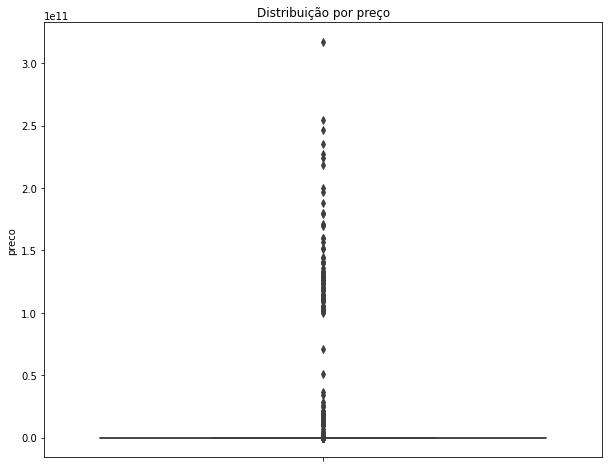

In [ ]:
# Boxplot to visualize real estate and how are their prices distributed. 
# pt-br | Boxplot para analisar os imóveis e como eles se distribuem pelo preço.

plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = kc_house_data, y="preco")
plt.title('Distribuição por preço')
plt.show()

## Outlier removal

Assuming that we have out of sight factos influencing our houses pricing, it is prudent to remove outliers.

- Normality test (QQplot)
- Outlier removal by Z-score

\


_pt-br | Remoção de outliers_

_Assumindo que temos imóveis com preços influenciados por fatores que estão fora do nosso alcance, temos que remover os outliers._

*   _Teste de normalidade (QQplot)_
*   _Remoção de outliers por Z-score_

In [ ]:
# Importing required libraries.
# pt-br | Importando as bibliotecas que vou utilizar.
import statsmodels.api as sm
from scipy.stats import norm
import pylab
import numpy as np

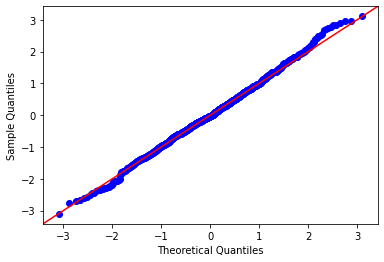

In [ ]:
# Verifying prices distribution along with QQplot.
# pt-br | QQplot para verificar a distribuição dos preços.
teste_norm = kc_house_data['preco']
teste_norm = norm.rvs(size=1000)
sm.qqplot(teste_norm, line='45')
pylab.show()

In [ ]:
# Defining the inter-quartile interval, maximum and minimum values.
# pt-br | Definindo o intervalo inter-quartil e os valores máximos e mínimos admitidos.
for x in ['preco']:
  q75,q25 = np.percentile(kc_house_data.loc[:,x],[75,25])
  intr_qr = q75-q25
 
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

# Still inside the for loop, I'm changing the out of range values for null values.
# pt-br | Ainda dentro do for loop, estou substituindo os valores fora do intervalo admitido por valores nulos.  
  kc_house_data.loc[kc_house_data[x] < min,x] = np.nan
  kc_house_data.loc[kc_house_data[x] > max,x] = np.nan

In [ ]:
# We ended up removing 1335 outliers.
# pt-br | Ao todo, encontramos 1335 imóveis com preços outliers.

kc_house_data.isnull().sum()

id                       0
data_venda               0
preco                 1335
quartos                  0
banheiros                0
area_util                0
area_total               0
pisos                    0
vista_lago               0
vista                    0
conservacao              0
nota                     0
area_piso_superior       0
area_porao               0
ano_construcao           0
ano da renovação         0
cep                      0
latitude                 0
longitude                0
valor_m2_total           0
valor_m2_util            0
dtype: int64

In [ ]:
# Removing null values from the dataset
# pt-br | Removendo os valores nulos do dataset
kc_house_data = kc_house_data.dropna(axis=0)

In [ ]:
# And now, we have got a dataset without outliers and ready to be analyzed.
# pt-br | Agora, temos um dataset sem os outliers e pronto para ser utilizado!
kc_house_data.isnull().sum()

id                    0
data_venda            0
preco                 0
quartos               0
banheiros             0
area_util             0
area_total            0
pisos                 0
vista_lago            0
vista                 0
conservacao           0
nota                  0
area_piso_superior    0
area_porao            0
ano_construcao        0
ano da renovação      0
cep                   0
latitude              0
longitude             0
valor_m2_total        0
valor_m2_util         0
dtype: int64

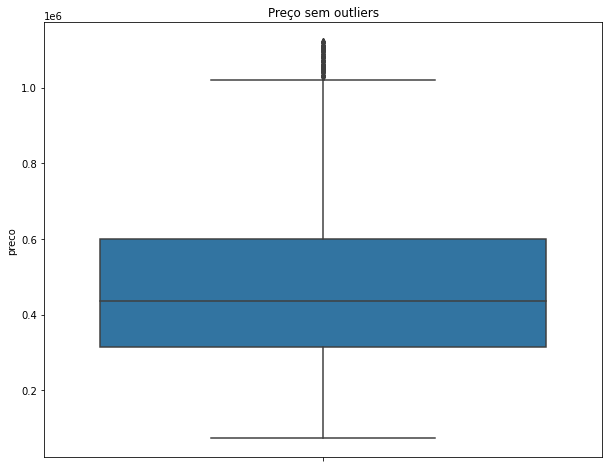

In [ ]:
# The boxplot already looks better.
# pt-br | O boxplot já nos mostra como a distribuição dos dados ficou melhor.
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = kc_house_data, y="preco")
plt.title('Preço sem outliers')
plt.show()

In [ ]:
# Descriptive statistics to be used in the dashboard.
# pt-br | Estatística descritiva do dataset para utilizarmos no dashboard.
kc_house_data.describe()

,id,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,conservacao,nota,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util
count,2.027800e+04,2.027800e+04,20278.000000,20278.000000,20278.000000,2.027800e+04,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000
mean,4.606559e+09,4.715276e+05,3.323799,2.043828,1963.315909,1.450738e+04,1.472902,0.002959,0.167423,3.405365,7.514844,1698.562777,264.753131,1970.770293,73.501627,98078.556761,430.728413,-122.213231,84.245350,253.582725
std,2.877771e+09,2.014609e+05,0.910827,0.706849,763.852478,3.986736e+04,0.536614,0.054316,0.630808,0.646610,1.025229,717.731485,406.476195,29.126118,375.858537,53.329711,131.073361,0.142461,89.906518,100.054144
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000,0.163119,87.588235
25%,2.133013e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,473.781000,-122.330000,32.503710,178.571429
50%,3.905100e+09,4.350000e+05,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1974.000000,0.000000,98065.000000,475.463000,-122.232000,56.221748,237.288136
75%,7.338402e+09,5.990000e+05,4.000000,2.500000,2420.000000,1.028250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2090.000000,500.000000,1996.000000,0.000000,98118.000000,476.714000,-122.123000,100.284628,304.562760
max,9.900000e+09,1.120000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,1346.153846,810.138889


## Clustering
Clustering is a non-supervisioned machine learning method that helps to group unlabeled data into groups of K-size defined by its distortion.

- Importing required libraries;
- Collecting numeric data into an array;
- Calculating and plotting distortion using the elbow method;
- Implementing model and plotting data;
- Labeling dataset.

\

_pt-br | Agrupamento de dados por clusterização_
_A clusterização é uma técnica de machine learning não supervisionado que ajuda a agrupar dados sem rótulo em um grupo de tamanho K definido pela distorção._
*   _Importar bibliotecas que vou utilizar;_
*   _Coletar dados numéricos que vamos utilizar para o agrupamento e armazená-los em um array;_
*   _Calcular a distorção e plotar usando o "elbow method";_
*   _Implementar o modelo e plotar;_
*   _Rotular os dados do dataset para depois separá-los._



In [ ]:
# Importing Kmeans and datasets packages from sklearn.
# pt-br | Importando os pacotes KMeans e datasets.
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
# Storing numeric values from the dataframe into a list of arrays.
# pt-br | Armazenando os valores numéricos do dataframe em uma lista de arrays.
x = kc_house_data.iloc[:, 2:22]
x = np.array(x)
x

array([[ 2.21900000e+05,  3.00000000e+00,  1.00000000e+00, ...,
        -1.22257000e+02,  3.92743363e+01,  1.88050847e+02],
       [ 5.38000000e+05,  3.00000000e+00,  2.25000000e+00, ...,
        -1.22319000e+02,  7.42888705e+01,  2.09338521e+02],
       [ 1.80000000e+05,  2.00000000e+00,  1.00000000e+00, ...,
        -1.22233000e+02,  1.80000000e+01,  2.33766234e+02],
       ...,
       [ 4.02101000e+05,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  2.97852593e+02,  3.94216667e+02],
       [ 4.00000000e+05,  3.00000000e+00,  2.50000000e+00, ...,
        -1.22069000e+02,  1.67504188e+02,  2.50000000e+02],
       [ 3.25000000e+05,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  3.02044610e+02,  3.18627451e+02]])

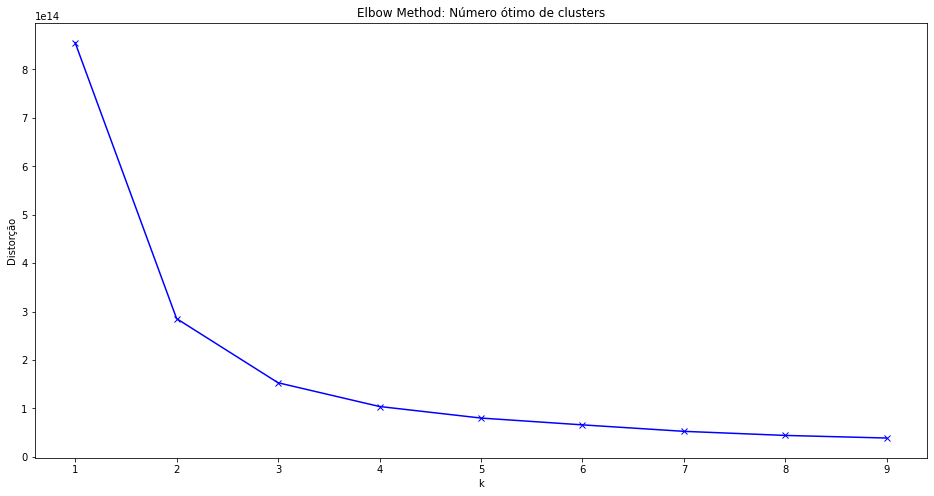

In [ ]:
# Calculating arrays distortion and storing them into a list.
# pt-br | Calculando a distorção dos arrays e armazenando-os em uma lista.
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)

# Plotting distortion.
# pt-br | Plotando a distorção no gráfico.
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Elbow Method: Número ótimo de clusters')
plt.show()

In [ ]:
# Implementing the model with 3 clusters, in which is the curve elbow.
# pt-br | Implementando o modelo com 3 clusters, que foi o ponto considerado "cotovelo" do gráfico.

kmeans_model = KMeans(n_clusters=3, random_state=32932)

# Now we use the data to employ the clustering in our dataset.
# pt-br | A partir dos dados fornecidos ao modelo, agora vamos usá-lo para predição do nosso dataset.

kmeans_predict = kmeans_model.fit_predict(x)

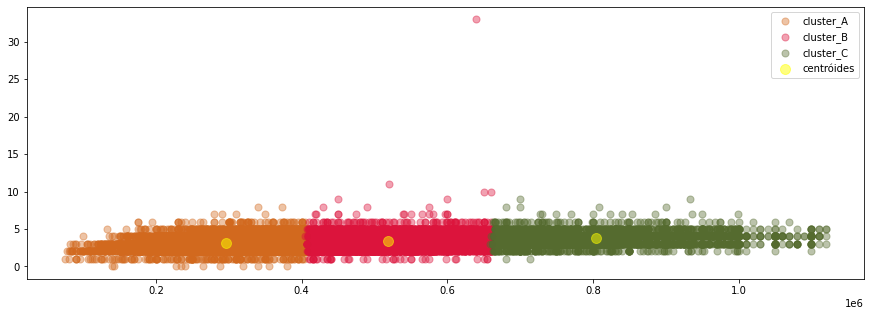

In [ ]:
# Visualizing clusters obtained from our model.
# pt-br | Visualizando os clusters calculados pelo modelo.

plt.figure(figsize=(15,5))
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 50, c = 'chocolate', alpha=0.4, label= 'cluster_A')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 50, c = 'crimson', alpha=0.4, label= 'cluster_B')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 50, c = 'darkolivegreen', alpha=0.4, label= 'cluster_C')

# Plotting clusters centroids.
# pt-br | Plotando os centróides dos clusters.
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'centróides', alpha=0.5)
plt.legend()

In [ ]:
# Labeling dataset.
# pt-br | Rotular os dados do dataset de acordo com os clusters.

kc_house_data['cluster'] = kmeans_predict

In [ ]:
# Visualizing labeled dataset.
# pt-br | Visualizando o dataset rotulado.

kc_house_data.head()

,id,data_venda,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,...,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util,cluster
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,475.112,-122.257,39.274336,188.050847,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.721,-122.319,74.288870,209.338521,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,477.379,-122.233,18.000000,233.766234,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,475.208,-122.393,120.800000,308.163265,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,476.168,-122.045,63.118812,303.571429,1


## Exploratory analysis of the clusters obtained
- Descriptive statistics;
- Correlation analysis.

\

_pt-br | Análise exploratória dos clusters obtidos_
*   _Estatística descritiva;_
*   _Análise de correlação._




### General dataset
_pt-br | Dataset geral_ 

In [ ]:
# Estatística descritiva do dataset
kc_house_data.describe()

,id,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,conservacao,...,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util,cluster
count,2.027800e+04,2.027800e+04,20278.000000,20278.000000,20278.000000,2.027800e+04,20278.000000,20278.000000,20278.000000,20278.000000,...,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000
mean,4.606559e+09,4.715276e+05,3.323799,2.043828,1963.315909,1.450738e+04,1.472902,0.002959,0.167423,3.405365,...,1698.562777,264.753131,1970.770293,73.501627,98078.556761,430.728413,-122.213231,84.245350,253.582725,0.735132
std,2.877771e+09,2.014609e+05,0.910827,0.706849,763.852478,3.986736e+04,0.536614,0.054316,0.630808,0.646610,...,717.731485,406.476195,29.126118,375.858537,53.329711,131.073361,0.142461,89.906518,100.054144,0.746988
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000,0.163119,87.588235,0.000000
25%,2.133013e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,...,1170.000000,0.000000,1951.000000,0.000000,98033.000000,473.781000,-122.330000,32.503710,178.571429,0.000000
50%,3.905100e+09,4.350000e+05,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,...,1510.000000,0.000000,1974.000000,0.000000,98065.000000,475.463000,-122.232000,56.221748,237.288136,1.000000
75%,7.338402e+09,5.990000e+05,4.000000,2.500000,2420.000000,1.028250e+04,2.000000,0.000000,0.000000,4.000000,...,2090.000000,500.000000,1996.000000,0.000000,98118.000000,476.714000,-122.123000,100.284628,304.562760,1.000000
max,9.900000e+09,1.120000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,1346.153846,810.138889,2.000000


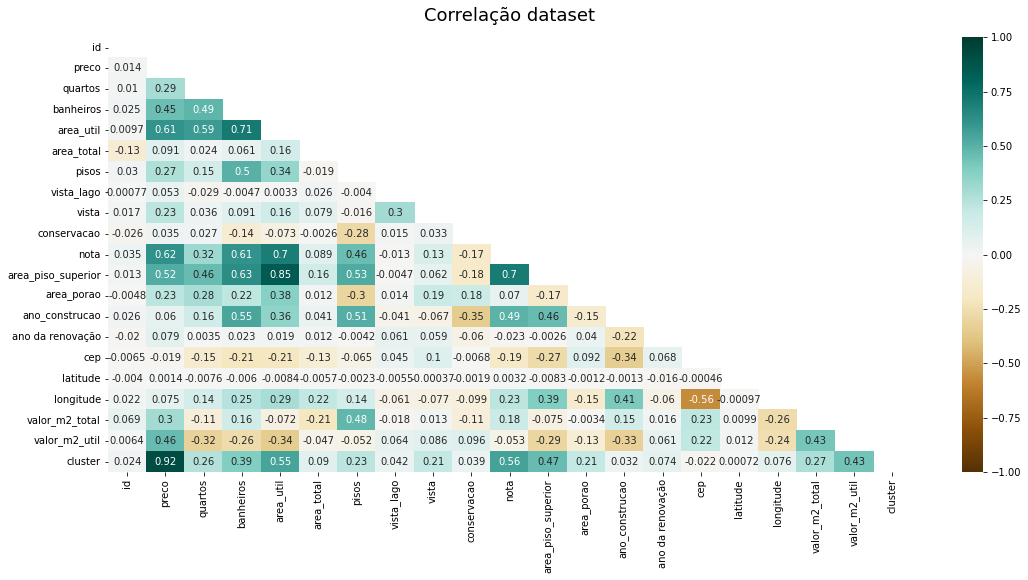

In [ ]:
# Plotando a correlação em um heatmap
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(kc_house_data.corr(), dtype=bool))
heatmap = sns.heatmap(kc_house_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dataset', fontdict={'fontsize':18}, pad=16);

### Cluster A

In [ ]:
kc_house_data[kc_house_data['cluster'] == 0].describe()

,id,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,conservacao,...,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util,cluster
count,9.054000e+03,9054.000000,9054.000000,9054.000000,9054.000000,9.054000e+03,9054.000000,9054.000000,9054.000000,9054.000000,...,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.0
mean,4.493950e+09,296647.332339,3.109565,1.774050,1580.909874,1.109241e+04,1.349348,0.000994,0.058648,3.385023,...,1407.388668,173.521206,1969.881378,51.251491,98079.057544,430.844673,-122.223988,56.136015,205.907222,0.0
std,2.836367e+09,68219.612454,0.834559,0.644726,540.101148,2.579297e+04,0.503112,0.031514,0.364965,0.638419,...,496.720693,321.388251,26.253429,315.377383,57.819183,129.876446,0.135209,65.179582,80.247930,0.0
min,1.000102e+06,75000.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.512000,0.163119,87.588235,0.0
25%,2.064801e+09,249000.000000,3.000000,1.000000,1180.000000,5.460000e+03,1.000000,0.000000,0.000000,3.000000,...,1052.500000,0.000000,1953.000000,0.000000,98031.000000,473.325000,-122.327000,26.575096,150.359894,0.0
50%,3.826000e+09,300000.000000,3.000000,1.750000,1510.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,...,1300.000000,0.000000,1969.000000,0.000000,98058.000000,474.486000,-122.262000,37.585363,184.037559,0.0
75%,7.237100e+09,350000.000000,4.000000,2.500000,1920.000000,9.750000e+03,2.000000,0.000000,0.000000,4.000000,...,1670.000000,260.000000,1991.000000,0.000000,98126.000000,475.476000,-122.162000,55.630969,242.051821,0.0
max,9.900000e+09,408000.000000,8.000000,5.250000,4060.000000,1.164794e+06,3.000000,1.000000,4.000000,5.000000,...,3597.000000,2030.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,622.119816,792.682927,0.0


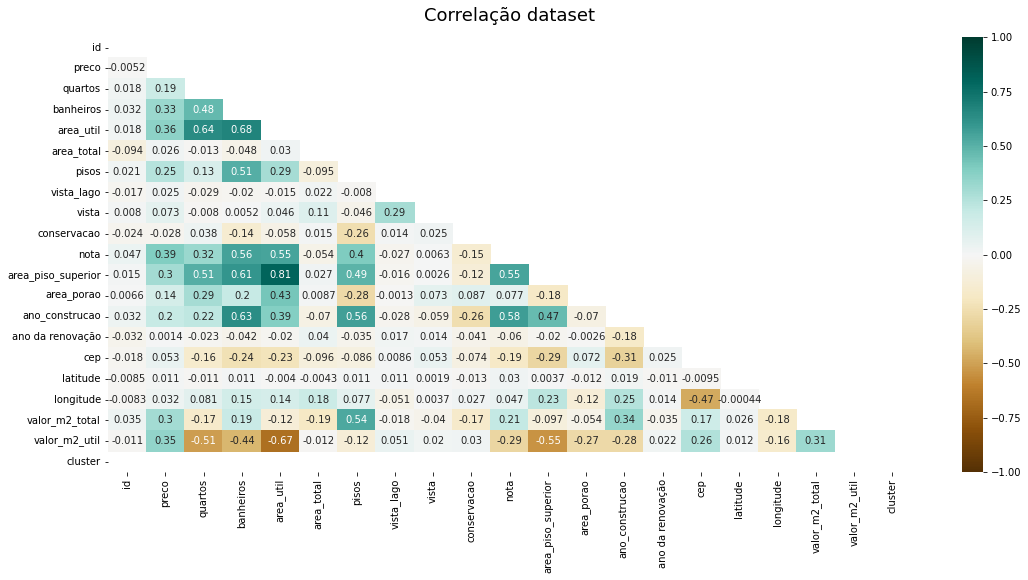

In [ ]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(kc_house_data[kc_house_data['cluster'] == 0].corr(), dtype=bool))
heatmap = sns.heatmap(kc_house_data[kc_house_data['cluster'] == 0].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dataset', fontdict={'fontsize':18}, pad=16);

### Cluster B

In [ ]:
kc_house_data[kc_house_data['cluster'] == 1].describe()

,id,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,conservacao,...,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util,cluster
count,7.541000e+03,7541.000000,7541.000000,7541.000000,7541.000000,7.541000e+03,7541.000000,7541.000000,7541.000000,7541.000000,...,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.0
mean,4.735660e+09,518895.803607,3.370906,2.132940,2034.894046,1.551109e+04,1.517571,0.003050,0.167882,3.403395,...,1722.175043,312.719003,1971.021615,70.865270,98079.669540,430.260060,-122.209282,102.099396,280.968487,1.0
std,2.877715e+09,71950.599674,0.942904,0.642543,660.304299,3.920109e+04,0.557790,0.055146,0.617329,0.637143,...,655.420810,418.372104,30.559611,369.204541,49.126557,132.476121,0.150359,102.318623,95.664684,0.0
min,1.200019e+06,404950.000000,1.000000,0.000000,540.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,...,480.000000,0.000000,1900.000000,0.000000,98001.000000,47.241000,-122.519000,0.505019,89.204658,1.0
25%,2.323069e+09,454000.000000,3.000000,1.750000,1540.000000,4.560000e+03,1.000000,0.000000,0.000000,3.000000,...,1230.000000,0.000000,1950.000000,0.000000,98034.000000,475.094000,-122.340000,47.777778,212.598425,1.0
50%,4.035900e+09,514000.000000,3.000000,2.250000,1970.000000,7.163000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1977.000000,0.000000,98074.000000,476.109000,-122.229000,72.560113,265.168539,1.0
75%,7.508200e+09,575000.000000,4.000000,2.500000,2440.000000,1.040000e+04,2.000000,0.000000,0.000000,4.000000,...,2134.000000,600.000000,1998.000000,0.000000,98117.000000,476.885000,-122.112000,114.983404,328.723404,1.0
max,9.842300e+09,661500.000000,33.000000,7.500000,5461.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,5450.000000,2196.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.405000,942.028986,791.666667,1.0


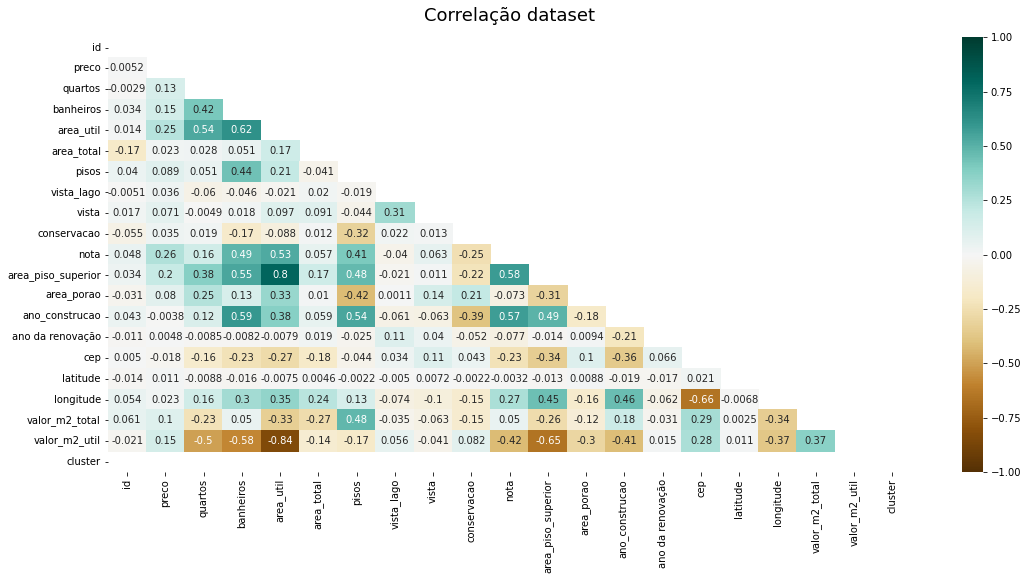

In [ ]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(kc_house_data[kc_house_data['cluster'] == 1].corr(), dtype=bool))
heatmap = sns.heatmap(kc_house_data[kc_house_data['cluster'] == 1].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dataset', fontdict={'fontsize':18}, pad=16);

### Cluster C

In [ ]:
kc_house_data[kc_house_data['cluster'] == 2].describe()

,id,preco,quartos,banheiros,area_util,area_total,pisos,vista_lago,vista,conservacao,...,area_piso_superior,area_porao,ano_construcao,ano da renovação,cep,latitude,longitude,valor_m2_total,valor_m2_util,cluster
count,3.683000e+03,3.683000e+03,3683.000000,3683.000000,3683.000000,3.683000e+03,3683.000000,3683.000000,3683.000000,3683.000000,...,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.0
mean,4.619052e+09,8.044526e+05,3.754005,2.524572,2756.835732,2.084736e+04,1.685175,0.007602,0.433885,3.459408,...,2366.016020,390.819712,1972.440945,133.597611,98075.047244,431.401567,-122.194872,116.790708,314.711688,2.0
std,2.966979e+09,1.039245e+05,0.856189,0.676490,776.663685,6.244499e+04,0.489490,0.086872,0.991634,0.682019,...,833.866805,506.376872,32.555680,499.445228,49.850716,131.146867,0.140952,94.737067,98.452625,0.0
min,3.600072e+06,6.590000e+05,1.000000,0.750000,890.000000,5.200000e+02,1.000000,0.000000,0.000000,2.000000,...,580.000000,0.000000,1900.000000,0.000000,98001.000000,47.323000,-122.514000,0.423893,106.951872,2.0
25%,2.024059e+09,7.190000e+05,3.000000,2.250000,2220.000000,5.097500e+03,1.000000,0.000000,0.000000,3.000000,...,1660.000000,0.000000,1951.000000,0.000000,98033.000000,475.506000,-122.319500,62.849866,247.292419,2.0
50%,3.924500e+09,7.825000e+05,4.000000,2.500000,2720.000000,8.025000e+03,2.000000,0.000000,0.000000,3.000000,...,2290.000000,0.000000,1980.000000,0.000000,98074.000000,476.186000,-122.195000,98.513779,290.441176,2.0
75%,7.518754e+09,8.750000e+05,4.000000,2.750000,3250.000000,1.276250e+04,2.000000,0.000000,0.000000,4.000000,...,3010.000000,800.000000,2001.000000,0.000000,98115.000000,476.728500,-122.081000,152.151865,358.963162,2.0
max,9.839301e+09,1.120000e+06,9.000000,6.750000,7480.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,...,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,477.764000,-121.691000,1346.153846,810.138889,2.0


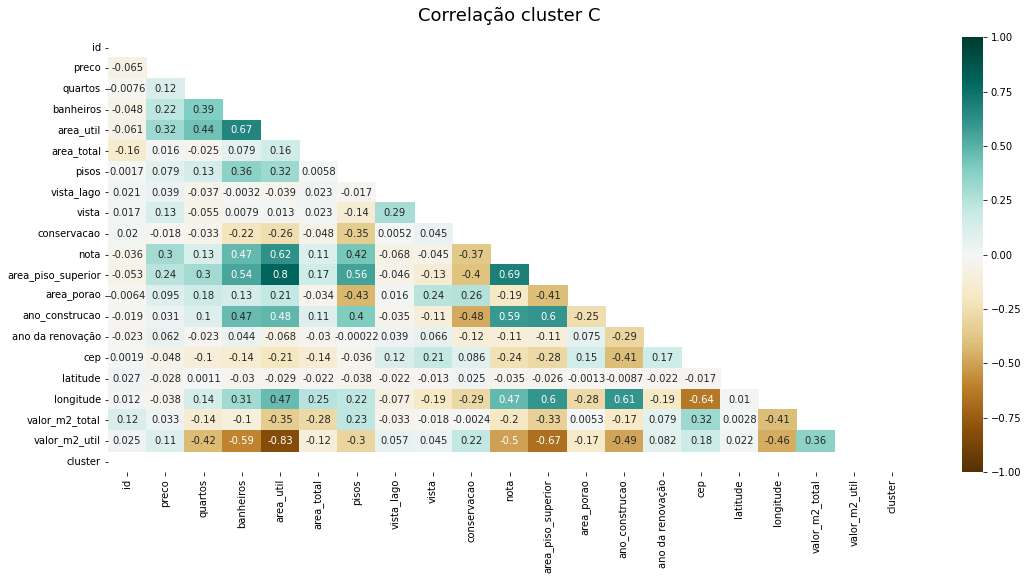

In [ ]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(kc_house_data[kc_house_data['cluster'] == 2].corr(), dtype=bool))
heatmap = sns.heatmap(kc_house_data[kc_house_data['cluster'] == 2].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação cluster C', fontdict={'fontsize':18}, pad=16);

## Downloading files to import into Power BI for dashboards.
_pt-br | Baixando os arquivos para importação no Power BI._

In [ ]:

kc_house_data.to_csv('/content/drive/MyDrive/Currículos enviados/Case Arbo - Analista de dados/kc_house_data_processed.csv', index=False,)


## [Extra] Heatmap

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
maxpr = kc_house_data.loc[kc_house_data['preco'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = kc_house_data.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['latitude'], maxpr['longitude']],popup='Highest Price: $'+str(format(maxpr['preco'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['latitude','longitude','count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap